In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = np.float32(x_train/255.0)
x_test = np.float32(x_test/255.0)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size= (2,2), strides=2))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides= 2))
model.add(Conv2D(64, kernel_size= 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides= 2))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

#train the network with 20% validation
history = model.fit(x_train, y_train, batch_size = 128, epochs=20, validation_split=0.2) #spits out the training accuracy

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.3047 - loss: 1.8793 - val_accuracy: 0.4787 - val_loss: 1.4145
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5202 - loss: 1.3332 - val_accuracy: 0.5589 - val_loss: 1.2414
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5801 - loss: 1.1748 - val_accuracy: 0.5881 - val_loss: 1.1459
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6235 - loss: 1.0630 - val_accuracy: 0.6159 - val_loss: 1.1069
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6473 - loss: 0.9932 - val_accuracy: 0.6405 - val_loss: 1.0223
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6832 - loss: 0.9094 - val_accuracy: 0.6664 - val_loss: 0.9715
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7040 - loss: 0.8502 - val_accuracy: 0.6740 - val_loss: 0.9450
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7212 - loss: 0.7948 - val_accuracy: 0

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 4ms/step - accuracy: 0.7024 - loss: 1.0228

Test accuracy: 0.7024000287055969


In [8]:
predictions = model.predict(x_test)

predictions[0]

np.argmax(predictions[0])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


3

In [9]:
print(history.history.keys())
print(model.summary())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 579,104 (2.21 MB)

 Trainable params: 193,034 (754.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 386,070 (1.47 MB)

None


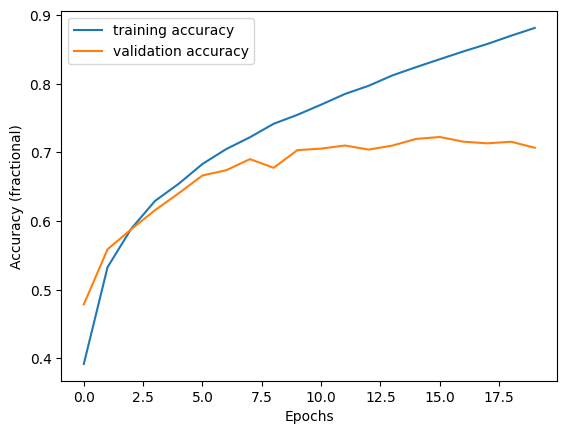

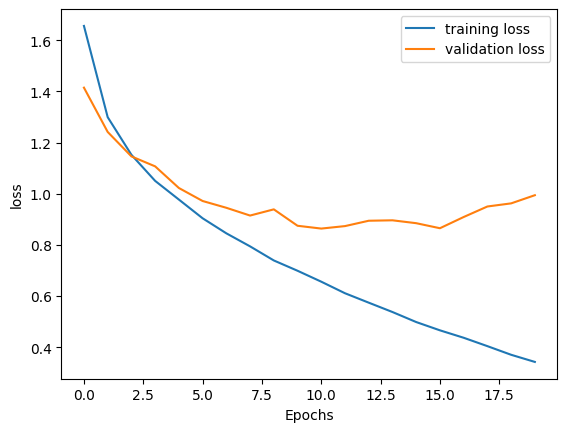

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (fractional)')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['training loss', 'validation loss'], loc='best')

In [ ]:
#implementing in Keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Conv3D
from keras import regularizers

#loading dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


#2. Convert xtest and xtrain to float32 and normalize data to range 0.0 - 1.0
x_train = np.float32(x_train/255.0)
x_test = np.float32(x_test/255.0)
#print(x_train_norm)
#print(x_test_norm)


#create ANN model
#model constants
l2_alpha = 0.0005 #L2 regularization hyperparameter


#define network
model = Sequential()
model.add(Conv2D(96, kernel_size=3, activation='relu', input_shape = (32, 32, 3)))
model.add(Conv2D(96, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size= (2,2), strides=2))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides= 2))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Conv2D(128, kernel_size=2, activation='relu'))
model.add(Conv2D(128, kernel_size=2, activation='relu'))
model.add(Conv2D(128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides= 2))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Flatten())
model.add(Dense(1024, activation = 'relu', kernel_regularizer= regularizers.l2(l2_alpha)))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Dense(512, activation = 'relu', kernel_regularizer= regularizers.l2(l2_alpha)))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Dense(10, activation = 'softmax'))

#Compile Network
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

#train the network with 20% validation
history = model.fit(x_train, y_train, batch_size = 128, epochs=40, validation_split=0.2) #spits out the training accuracy

#test accuracy and loss
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

predictions = model.predict(x_test)

predictions[0]

np.argmax(predictions[0])

print(history.history.keys())
print(model.summary())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (fractional)')
plt.legend(['training accuracy', 'validation accuracy'], loc='best')

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['training loss', 'validation loss'], loc='best')


Epoch 1/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 50ms/step - accuracy: 0.1604 - loss: 2.3819 - val_accuracy: 0.2831 - val_loss: 1.9543
Epoch 2/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 0.3172 - loss: 1.8266 - val_accuracy: 0.4375 - val_loss: 1.5654
Epoch 3/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.4099 - loss: 1.6480 - val_accuracy: 0.4846 - val_loss: 1.4855
Epoch 4/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.4631 - loss: 1.5282 - val_accuracy: 0.5188 - val_loss: 1.3653
Epoch 5/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.4921 - loss: 1.4692 - val_accuracy: 0.5322 - val_loss: 1.3654
Epoch 6/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.5148 - loss: 1.4092 - val_accuracy: 0.5751 - val_loss: 1.2549
Epoch 7/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.5445 - loss: 1.3432 - val_accuracy: 0.5804 - val_loss: 1.2408
Epoch 8/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.5633 - loss: 1.3001 - va